<a href="https://colab.research.google.com/github/heefakhan/heefa/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C:\Users\Faiza\AppData\Local\Temp\ipykernel_21976\632286705.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Faiza\AppData\Local\Temp\ipykernel_21976\632286705.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

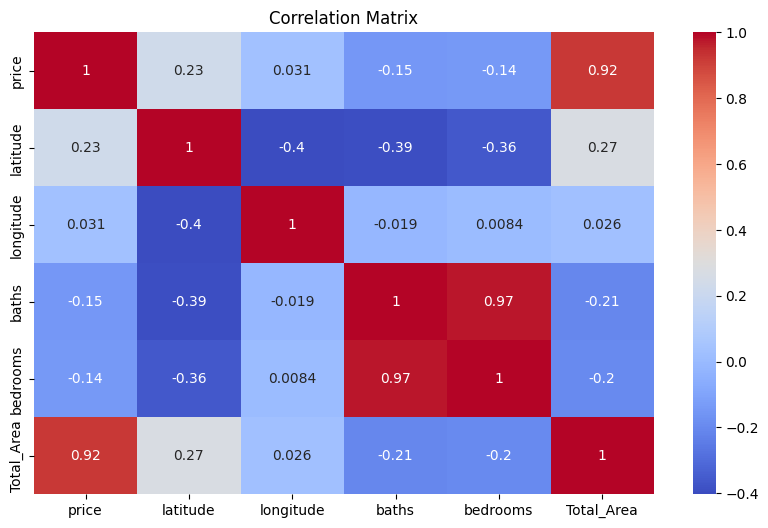

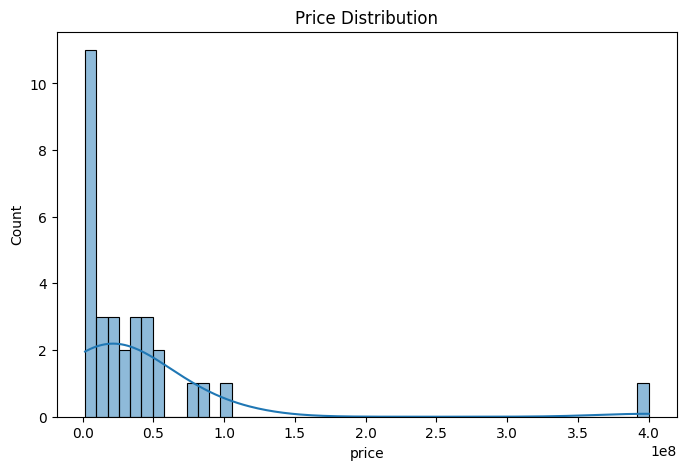

RMSE: 25494370.485742256
R2 Score: -0.0608931929993044
   property_type      price            location       city      province_name  \
0           Flat   10000000                G-10  Islamabad  Islamabad Capital   
1           Flat    6900000                E-11  Islamabad  Islamabad Capital   
2          House   16500000                G-15  Islamabad  Islamabad Capital   
3          House   43500000           Bani Gala  Islamabad  Islamabad Capital   
4          House    7000000         DHA Defence  Islamabad  Islamabad Capital   
5          House   34500000         Ghauri Town  Islamabad  Islamabad Capital   
6          House   27000000         Korang Town  Islamabad  Islamabad Capital   
7           Flat    7800000                E-11  Islamabad  Islamabad Capital   
8          House   50000000         DHA Defence  Islamabad  Islamabad Capital   
9      Penthouse   40000000                F-11  Islamabad  Islamabad Capital   
10          Flat   35000000  Diplomatic Enclave  Islam

In [15]:
# House Price Forecasting - Complete ML Pipeline
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_excel("Forcasting house datasets.xlsx", sheet_name="Sheet1")


# 3. Data Cleaning
# Drop unnecessary columns
df.drop(columns=['S.No', 'property_id', 'location_id', 'page_url', 'agency', 'agent'], inplace=True)

# Drop rows with missing target variable
df = df.dropna(subset=['price'])

# Fill missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 4. EDA (Exploratory Data Analysis)
# Plot correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

# 5. Feature Engineering
X = df.drop('price', axis=1)
y = df['price']

# Separate features by type
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 6. Preprocessing Pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# 7. Modeling
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print(df)